# Calculation of Apparent Standard Potential from Cyclic Volammetry Electrodeposition Peak on Foreign Substrate using a Digital Staircase

### Before using this computation tool ensure that you meet the following conditions:
1. Electrochemical reversibility (i.e., peak current ($I_p$) is linear with sqaure root of scan rate ($\nu$), peak potential ($E_p$) independent of $\nu$)								
2. Semi-infinite linear diffusion (i.e., $\nu << \frac {RTD_{Ox}}{nFr_0}$)								
3. Metal deposits onto a clean foreign substrate (e.g., La deposition onto W)								
4. A digital staircase is used to approximate a true analogy linear scan ($\Delta E = 0$ for analog scan)

### Nomenclature
|        |                                       |           |                                          |
|:-------|:--------------------------------------|:----------|:-----------------------------------------|
|$A$     |Area of working electrode              |$R$        |Universal Gas Constant                    |
|$C_{Ox}$|Concentration of counter ion of deposit|$R_u$      |Uncompensated resistance                  |
|$D_{Ox}$|Diffusion coefficient                  |$r_A$      |Radius of deposited atoms or molecules    |
|$e$     |Roughness factor for electrode/deposits|$T$        |Temperature of electrolyte                |
|$E_{eq}$|Equilibrium potential                  |$x_{Ox}$   |Mole fraction of counter ion of deposit   |
|$E^{0'}$|Apparent standard potential            |$\Delta E$ |Potential step (scan rate × sampling time)|
|$E_p$   |Peak potential                         |$\nu$      |Scan rate                                 |
|$F$     |Faraday's constant                     |$\rho_D$   |Mass density of deposit                   |
|$MW$    |Molecular or atomic mass of deposit    |$\eta_\rho$|Peak overpotential                        |
|$n$     |Number of electrons exchanged          |           |                                          |

### Equations
#### Monolayer of Deposit Calculation
|       |
|:-----:|
|$$\Gamma_1 = e\frac{\rho_D\left(2r_A\right)}{MW}$$|

#### Dimensionless Paramenters
|    |    |    |
|:--:|:--:|:--:|
|$$\Delta\epsilon_s=\frac{nF}{RT}\mid\Delta E\mid$$|$$\chi=\frac{C_{Ox}^*}{\Gamma_1}\sqrt{\frac{D_{Ox}RT}{nF\nu}}$$|$$\rho=\sqrt{\frac{n^5F^5D_{Ox}\nu}{R^3T^3}}R_uAC_{Ox}^*$$|

#### Calculated Peak Potential
|    |
|:--:|
|$$\eta_p=\frac{RT}{nF}\left[-0.854-0.525\rho-0.571\left(1-e^{-\rho^{1.177}}\right)+\Delta\epsilon_s^{0.467}\left(0.134-e^{-\left(0.722+0.515/\Delta\epsilon_s^{0.5}\right)\rho}\right)-\frac{0.34}{\chi\left(1+0.65\rho^{2.7}\right)}\right]$$|
|$$\eta_p=E_p-E_{eq}=E_p-E^{0'}-\frac{RT}{nF}ln\left(x_{Ox}\right)$$|

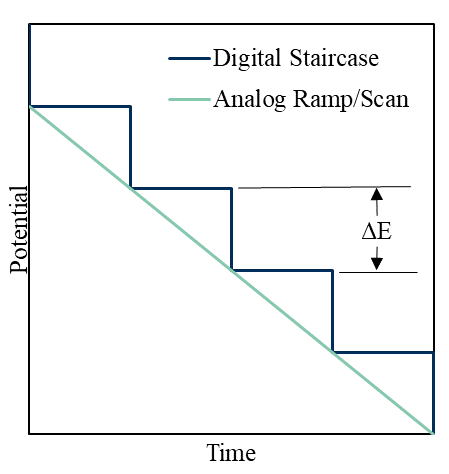

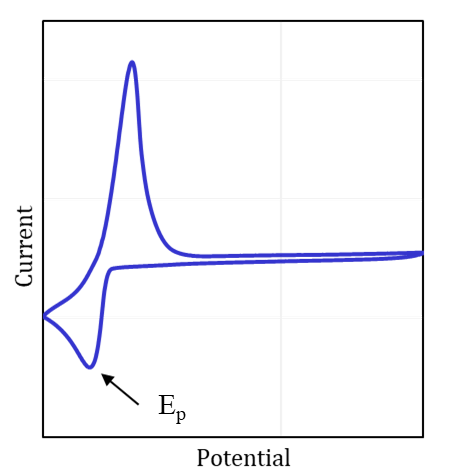

***Note:*** *This figure is an example. Consult your specific potentiostat software to ensure parameters are defined in the same manner. You may need to convert your potentiostat parameters to match the definitions in this figure.*

<font color='red'>Please cite the following sources when using this computational tool.</font>
1. Krulic, D.; Fatouros, N.; Liu, D. A Complementary Survey of Staircase Voltammetry with Metal Ion Deposition on Macroelectrodes. J. Electroanal. Chem. 2015, 754, 30–39. https://doi.org/10.1016/j.jelechem.2015.06.012.
2. Rappleye, D. S.; Fuller, R. G. Bringing the Analysis of Electrodeposition Signals in Voltammetry Out of the Shadows. J. Electrochem. Soc. 2023, 170 (6), 063505. https://doi.org/10.1149/1945-7111/acd879.

# Imports

In [2]:
!pip install numpy
import numpy as np

# Inputs

In [14]:
A      = 0.7835   #cm^2
COx    = 5.03E-5  #mol cm^-3
e      = 1.5
DOx    = 1.94E-5  #cm^2 s^-1
MW     = 238.0289 #g mol^-1
n      = 3        #eq/mol
rA     = 175      #pm
Ru     = 0.33     #ohms
T      = 773      #K
xOx    = 0.0018   #mol fraction
DeltaE = 0.0022   #V
rhoD   = 18.9     #g cm^-3

F = 96485 #C eq^-1
R = 8.314 #J mol^-1 K^-1

#these arrays accept as many data points as provided
nu     = np.array([0.1, 0.15])   #V s^-1
EpMeas = np.array([-0.0708, -0.07538]) #V

# Calculations

In [20]:
Gamma1   = e * (rhoD*2*rA*1E-10)/MW
Deltaeps = n*F/R/T * abs(DeltaE)
chi      = COx/Gamma1 * np.sqrt(DOx*R*T/n/F/nu)
rho      = Ru*A*COx*np.sqrt((n*F)**5*DOx*nu / (R*T)**3)

etapCalc = R*T/n/F*(-0.854 - 0.525*rho - 0.571*(1-np.exp(-rho**1.177)) +\
                    Deltaeps**0.467*(0.134 - np.exp(-rho*(0.722+0.515/Deltaeps**0.5))) -\
                    0.34/chi/(1 + 0.65*rho**2.7))

E0PrimeMolFrac = EpMeas - etapCalc - R*T/n/F*np.log(xOx)
E0PrimeConc    = EpMeas - etapCalc - R*T/n/F*np.log(COx)

#report parameters
if len(nu) == 1 and len(EpMeas) == 1:
    print(f'Γ1:  {Gamma1:.3E}')
    print(f'Δϵs: {Deltaeps:.3E}')
    print(f'χ:   {chi[0]:.3E}')
    print(f'ρ:   {rho[0]:.3E}\n')

    print(f'-- Calculated Apparent Standard Potential --')
    print(f'E0\': {E0PrimeMolFrac[0]:.3E} V (mole fraction basis)')
    print(f'     {E0PrimeConc[0]:.3E} V (concentration basis)')
    
elif len(nu) == len(EpMeas):
    print(f'Γ1:  {Gamma1:.3E}')
    print(f'Δϵs: {Deltaeps:.3E}')
    print(f'χ:   {np.round(chi,3)}')
    print(f'ρ:   {np.round(rho,3)}\n')

    print(f'-- Calculated Apparent Standard Potential --')
    print(f'E0\': {np.round(E0PrimeMolFrac,3)} V (mole fraction basis)')
    print(f'     {np.round(E0PrimeConc,3)} V (concentration basis)')
    
else:
    print('Please Ensure that nu and EpMeas have the same length.')

Γ1:  4.169E-09
Δϵs: 9.909E-02
χ:   [25.043 20.447]
ρ:   [1.585 1.941]

-- Calculated Apparent Standard Potential --
E0': [0.117 0.117] V (mole fraction basis)
     [0.196 0.196] V (concentration basis)


### Sources of pre-loaded example data:

1. "Multiple Scan Rates: (1) Rappleye, D.; Teaford, K.; Simpson, M. F. Investigation of the Effects of Uranium(III)-Chloride Concentration on Voltammetry in Molten LiCl-KCl Eutectic with a Glass Sealed Tungsten Electrode. Electrochimica Acta 2016, 219, 721–733. https://doi.org/10.1016/j.electacta.2016.10.075.
2. Single Scan Rate: (2) Rappleye, D.; Newton, M. L.; Zhang, C.; Simpson, M. F. Electroanalytical Measurements of Binary-Analyte Mixtures in Molten LiCl-KCl Eutectic: Uranium(III)- and Magnesium(II)-Chloride. J. Nucl. Mater. 2017, 486, 369–380. https://doi.org/10.1016/j.jnucmat.2017.01.047."				